# Заревич Михаил 513-2

In [2]:
import math
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# загрузил вариант в папку content
df = pd.read_csv("/content/variant30.csv")

# кортеж (количество строк(т.е. объём выборки), количество столбцов)
print(df.shape)

print(df)

(100000, 2)
       Unnamed: 0 SEX
0               0   F
1               1   F
2               2   F
3               3   M
4               4   F
...           ...  ..
99995       99995   M
99996       99996   F
99997       99997   F
99998       99998   F
99999       99999   F

[100000 rows x 2 columns]


## Тест

In [29]:
# тест, задание дальше
# df с количествами значений M и F
count_values = df['SEX'].value_counts()
print(count_values)

# считает m и f отдельно
print("m и f отдельно")
m_count = count_values["M"]
f_count = count_values["F"]
print(m_count,f_count)

# относительная частота
# df.shape[0] - количество строк, т.е. объём выборки
print("Относительная частота")
print(m_count/df.shape[0])

SEX
M    51018
F    48982
Name: count, dtype: int64
m и f отдельно
51018 48982
Относительная частота
0.51018


## Задание

In [30]:
# датафрейм для хранения выборок
new_df = pd.DataFrame({"Объём выборки": [], "Относительная частота рождения мальчика": []})

# Из заданной выборки составьте по 100 выборок меньшего
# объёма каждый раз уменьшая объём выборки на порядок.
for i in range(2,4+1):

    # 100 выборок по 10^2, по 10^3, 10^4, 10^5 - это уже 100 000, это значение добавлю отдельно
    n = 10**i

    for j in range(100):

        # Рассчитайте относительную частоту появления мальчика
        # для каждой составленной выборки.

        # sample - случайная выборка
        # n - количество элементов в выборке
        df_sample = df.sample(n)

        # df с количествами значений M и F
        count_values = df_sample['SEX'].value_counts()
        # считает m отдельно
        m_count = count_values["M"]

        # Рассчитайте относительную частоту появления мальчика для каждой составленной выборки.
        # Запишите найденные относительные частоты в DataFrame

        # относительная частота
        temp = m_count/df_sample.shape[0]

        new_row = pd.DataFrame({"Объём выборки": [n], "Относительная частота рождения мальчика": [temp]})
        new_df = pd.concat([new_df, new_row], ignore_index=True)

# добавляю выборку из 100 000 значений, она может быть только одна
count_values = df['SEX'].value_counts()
m_count = count_values["M"]
temp = m_count/df.shape[0]
new_row = pd.DataFrame({"Объём выборки": [100000], "Относительная частота рождения мальчика": [temp]})
new_df = pd.concat([new_df, new_row], ignore_index=True)

In [31]:
# вывод полученных данных
new_df

,Объём выборки,Относительная частота рождения мальчика
0,100.0,0.50000
1,100.0,0.50000
2,100.0,0.47000
3,100.0,0.43000
4,100.0,0.59000
...,...,...
296,10000.0,0.50490
297,10000.0,0.51030
298,10000.0,0.50910
299,10000.0,0.50690


Визуализация в виде облака точек

Сделал в двух вариантах, не знал, какой из них лучше.

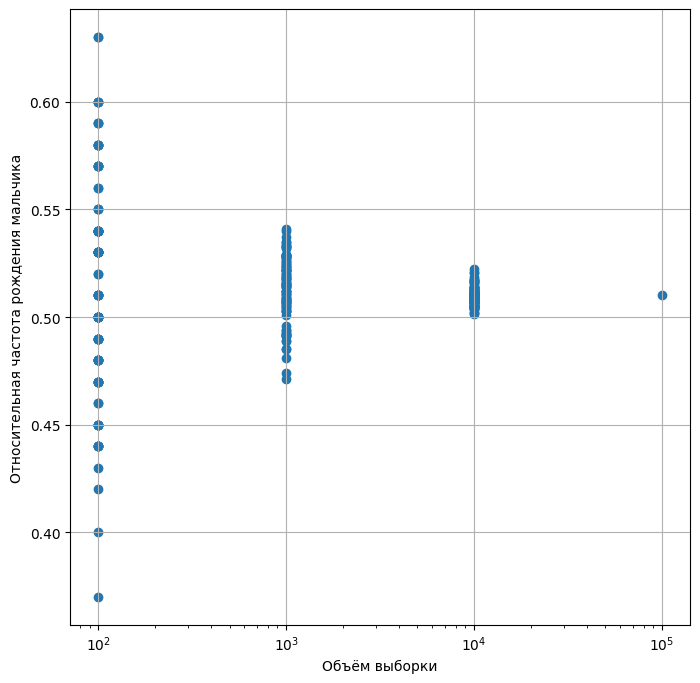

In [36]:
plt.figure(figsize=(8,8))
plt.scatter(new_df["Объём выборки"], new_df["Относительная частота рождения мальчика"])
plt.xscale("log")
plt.xlabel("Объём выборки")
plt.ylabel("Относительная частота рождения мальчика")
plt.grid(True)
plt.savefig("Выборка.png") # сохранение файла в текущую директорию
plt.show()


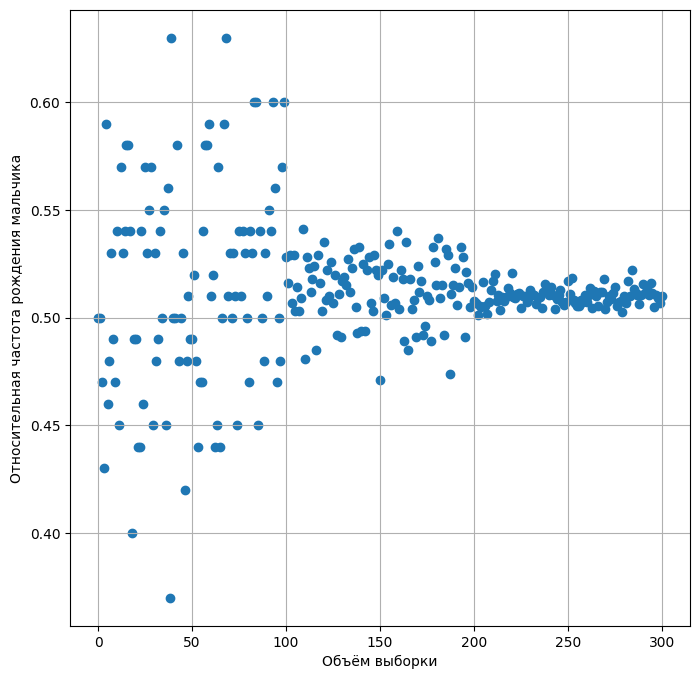

In [33]:
indexes = [i for i in range(len(list(new_df.index)))]

plt.figure(figsize=(8,8))
plt.scatter(indexes, new_df["Относительная частота рождения мальчика"])
plt.xlabel("Объём выборки")
plt.ylabel("Относительная частота рождения мальчика")
plt.grid(True)
plt.show()


In [34]:
new_df.to_csv("/content/Results.csv", sep=',', index=False)

## Ответы на вопросы

1 Наблюдается ли на примере составленных выборок устойчивость относительных частот?

Устойчивость наблюдается. Особенно хорошо это заметно в выборках из 1000 и более человек


2 Как влияет на результаты увеличение объёма выборки?

Мальчики рождаются с вероятностью 0,5 или 50%. Из полученных данных видно, что, чем больше выборка, т.е. количество опытов, тем меньше относительная частота колеблется вокруг этого значения.
